In [1]:
%load_ext lab_black

In [2]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
import nb_eval.matplotlib_functions as mympf
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval
import models.reg as rm


import matplotlib_functions as mympf

mympf.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

2023-03-01 18:31:34.477666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

In [3]:
name_model = "/cerea_raid/users/dumontj/dev/coco2/dl/res/inversion/inv_box_sweep/0"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"

### On extra_valid data

In [4]:
data = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_eval_nc,
)

model = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model), name_w="w_best.h5"
)

2023-03-01 18:31:42.771138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 18:31:43.283970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14757 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [5]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

2023-03-01 18:31:45.108048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-01 18:31:45.718790: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 3s 5ms/step
mae: 3.9348378
mape: 21.387318


In [6]:
mean_metrics = model_eval.get_inv_mean_loss(data)
print("mae:", np.mean(mean_metrics["mae"]))
print("mape:", np.mean(mean_metrics["mape"]))

mae: 3.6183367
mape: 20.696836


197/197 [==============================] - 1s 4ms/step


<Figure size 1920x1440 with 0 Axes>

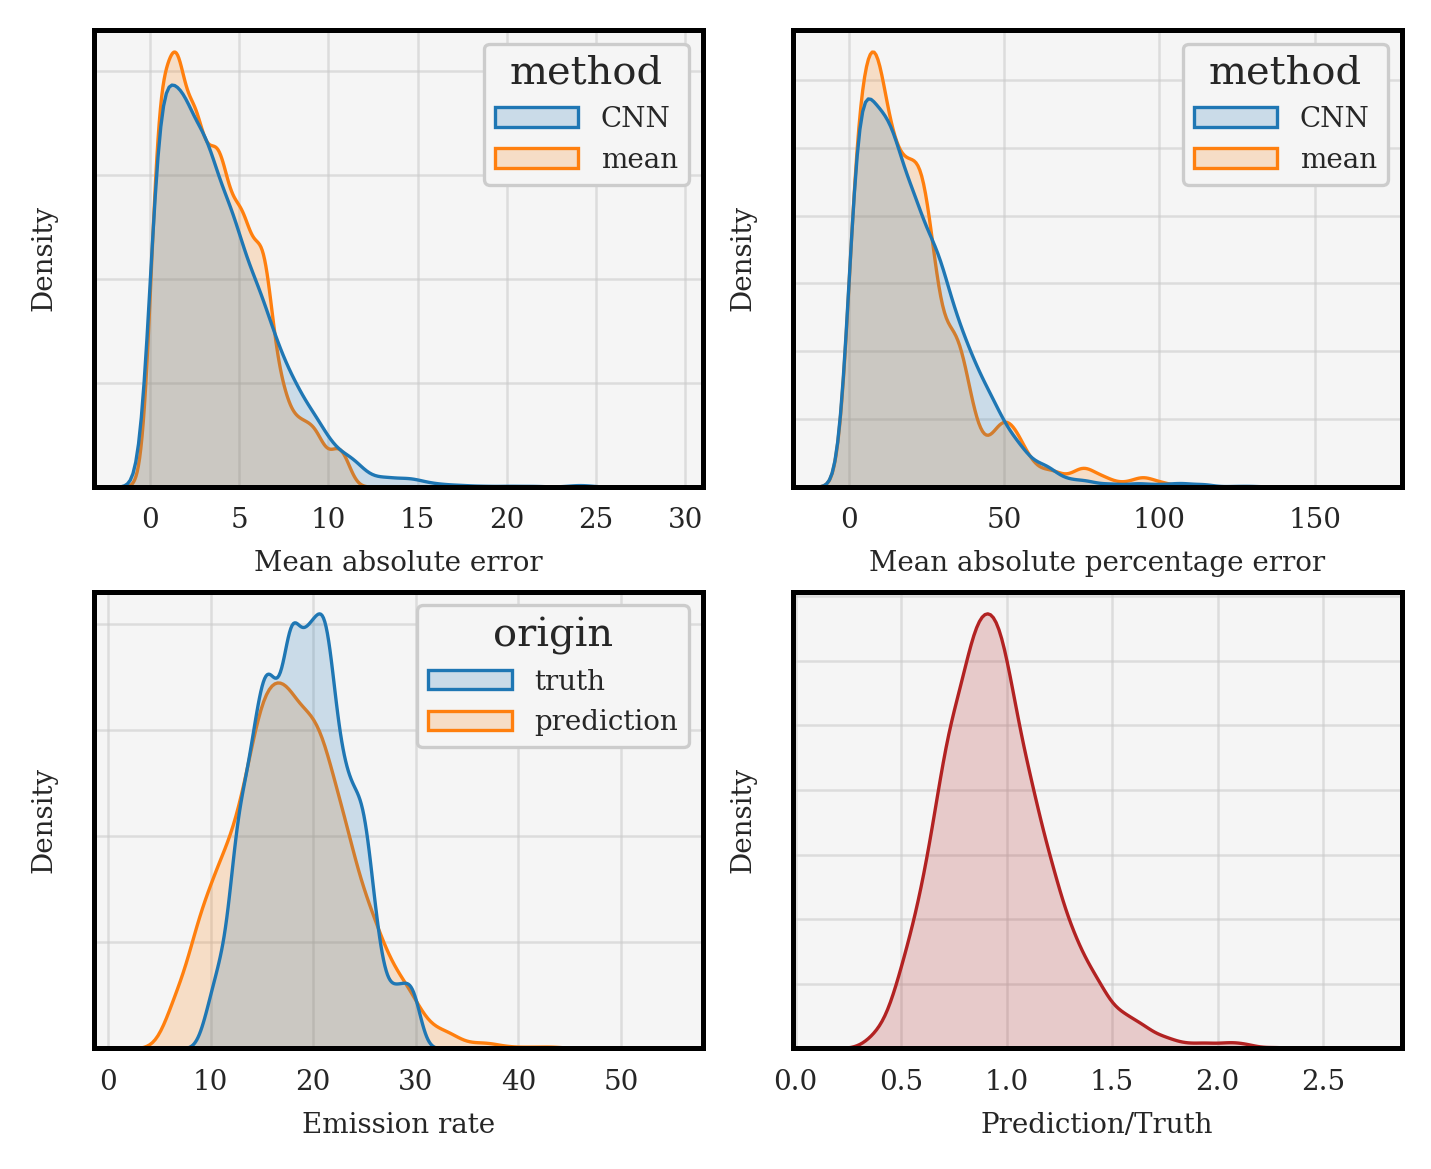

In [7]:
model_eval.get_summary_histo_inversion(model, data)

nwbce: tf.Tensor(5.45053, shape=(), dtype=float32)
idx 2208
origin: smart_2km_Box_64
time: 2015-05-09T00:00:00.000000000
emiss: [11.98107 17.29664 18.37784]
nwbce: tf.Tensor(4.0435514, shape=(), dtype=float32)
idx 5574
origin: smart_2km_Box_64
time: 2015-11-13T06:00:00.000000000
emiss: [19.23411 15.47052 15.05228]
nwbce: tf.Tensor(0.93317795, shape=(), dtype=float32)
idx 158
origin: smart_2km_Box_64
time: 2015-01-11T14:00:00.000000000
emiss: [21.45064 22.01514 22.76778]
1/1 [==============================] - 0s 15ms/step


<Figure size 1920x1440 with 0 Axes>

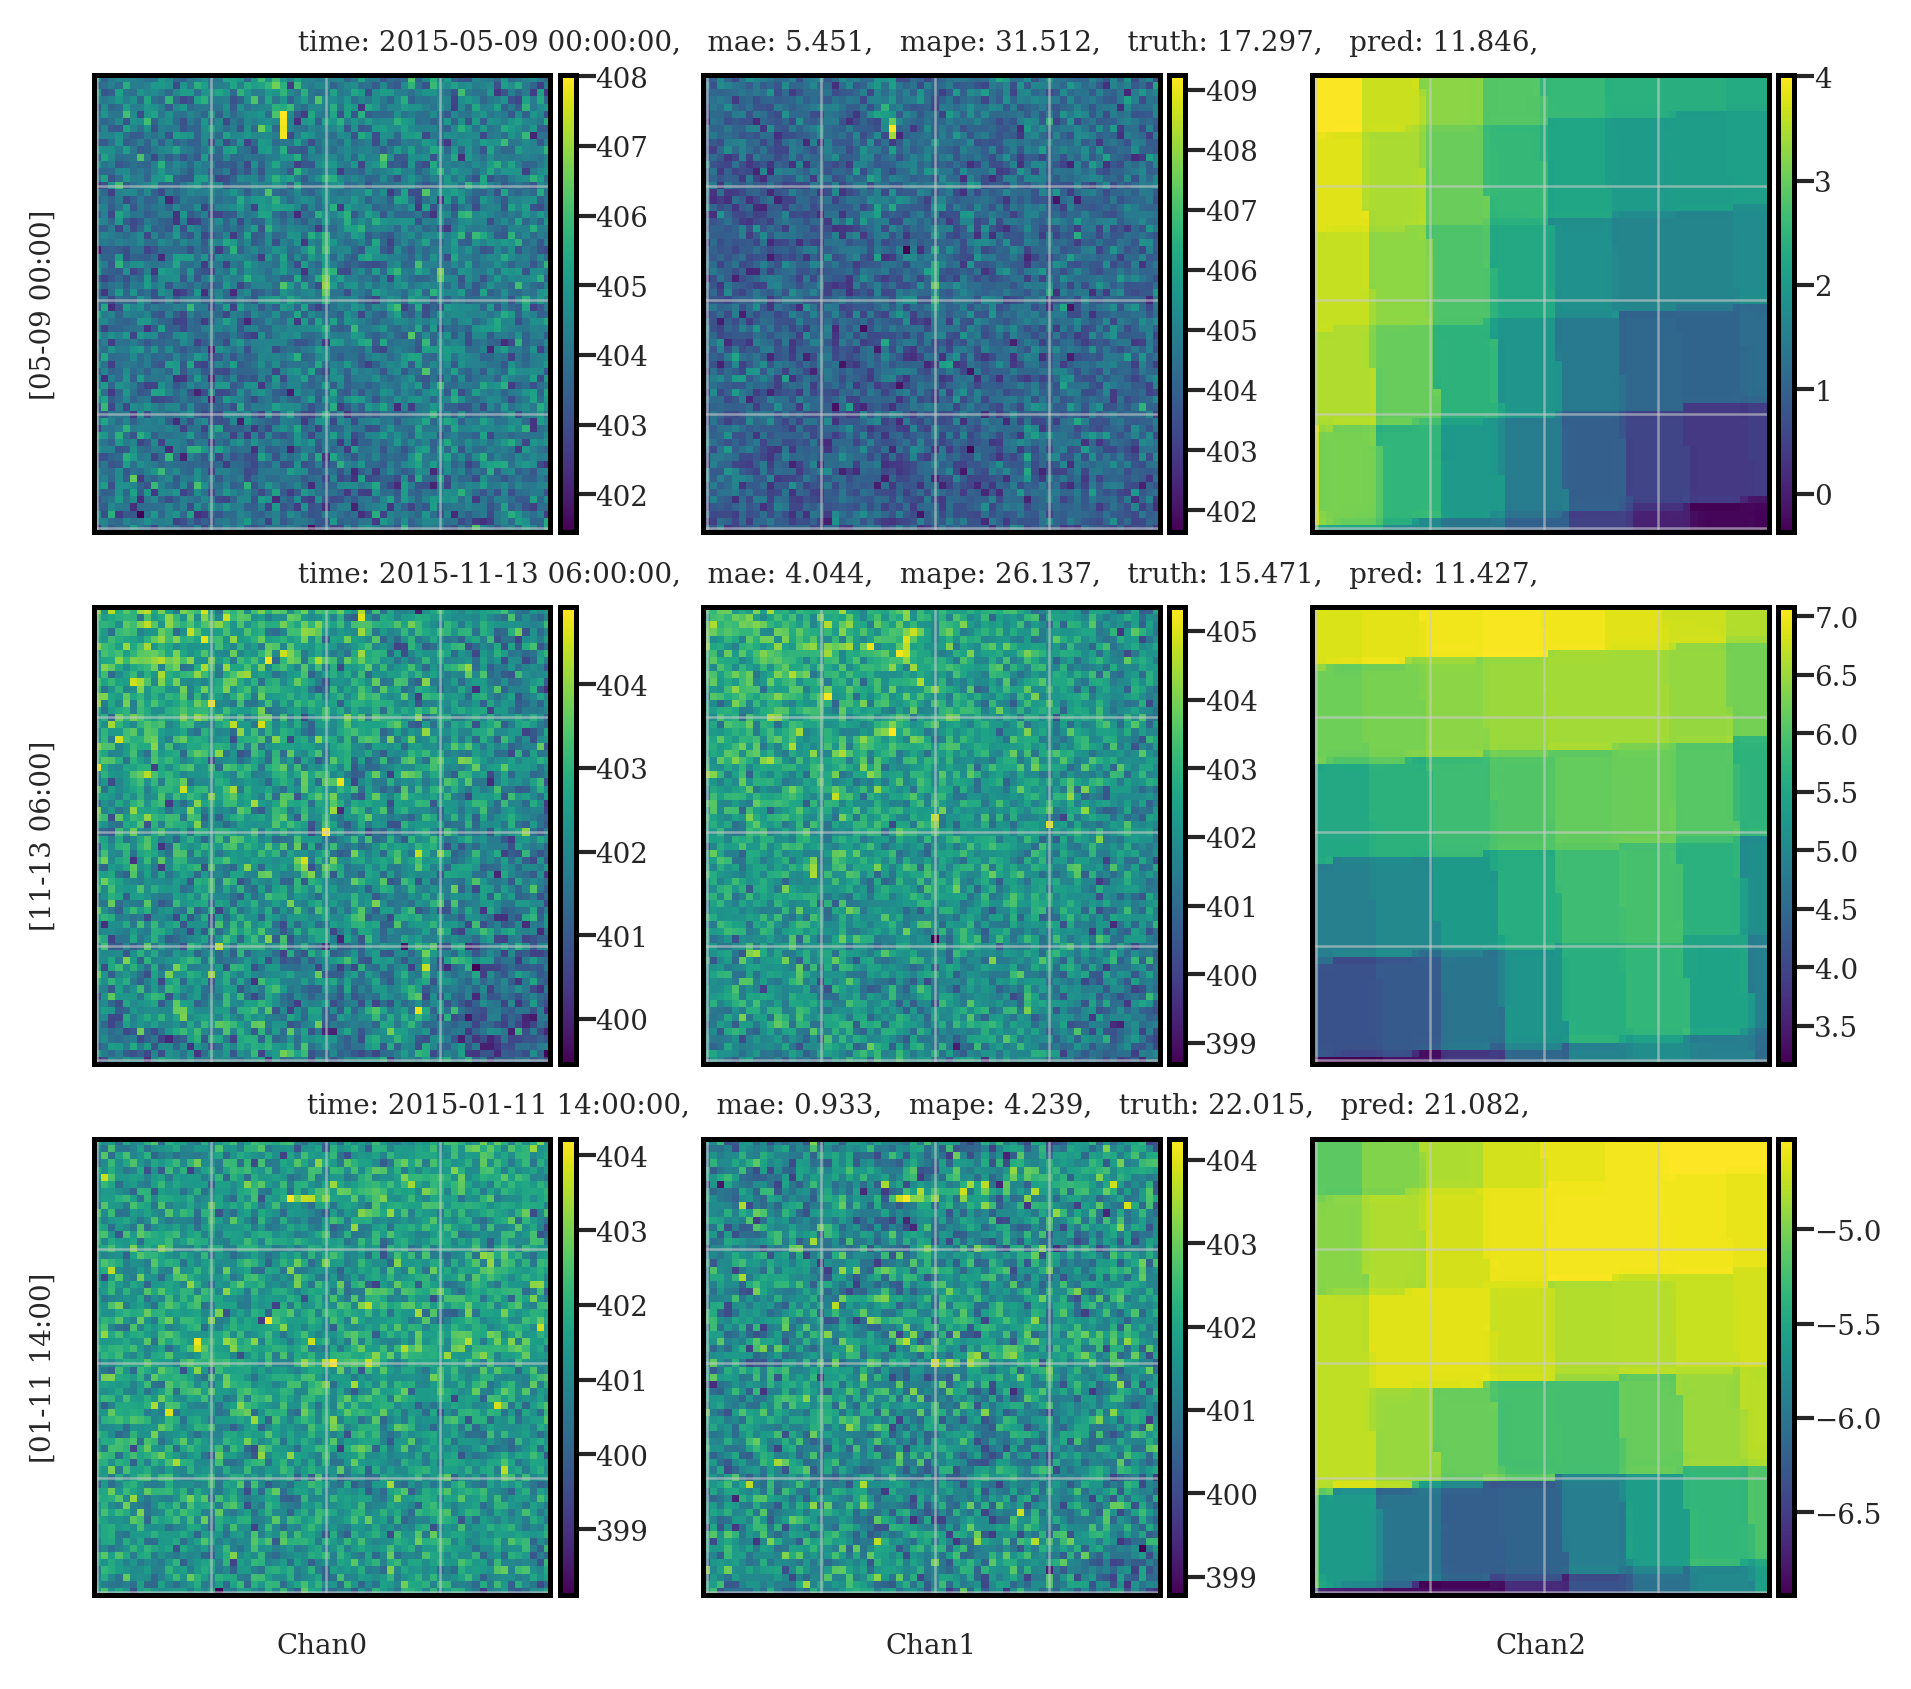

In [8]:
model_eval.plot_inversion_examples(data, metrics["mae"], metrics["mape"], model)

### On validation dataset

In [9]:
data_val = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_valid_nc,
)

In [10]:
metrics_val = model_eval.get_inv_metrics_model_on_data(model, data_val)
print("mae:", np.mean(metrics_val["mae"]))
print("mape:", np.mean(metrics_val["mape"]))

144/144 [==============================] - 1s 5ms/step
mae: 3.613417
mape: 29.88561


144/144 [==============================] - 1s 5ms/step


<Figure size 1920x1440 with 0 Axes>

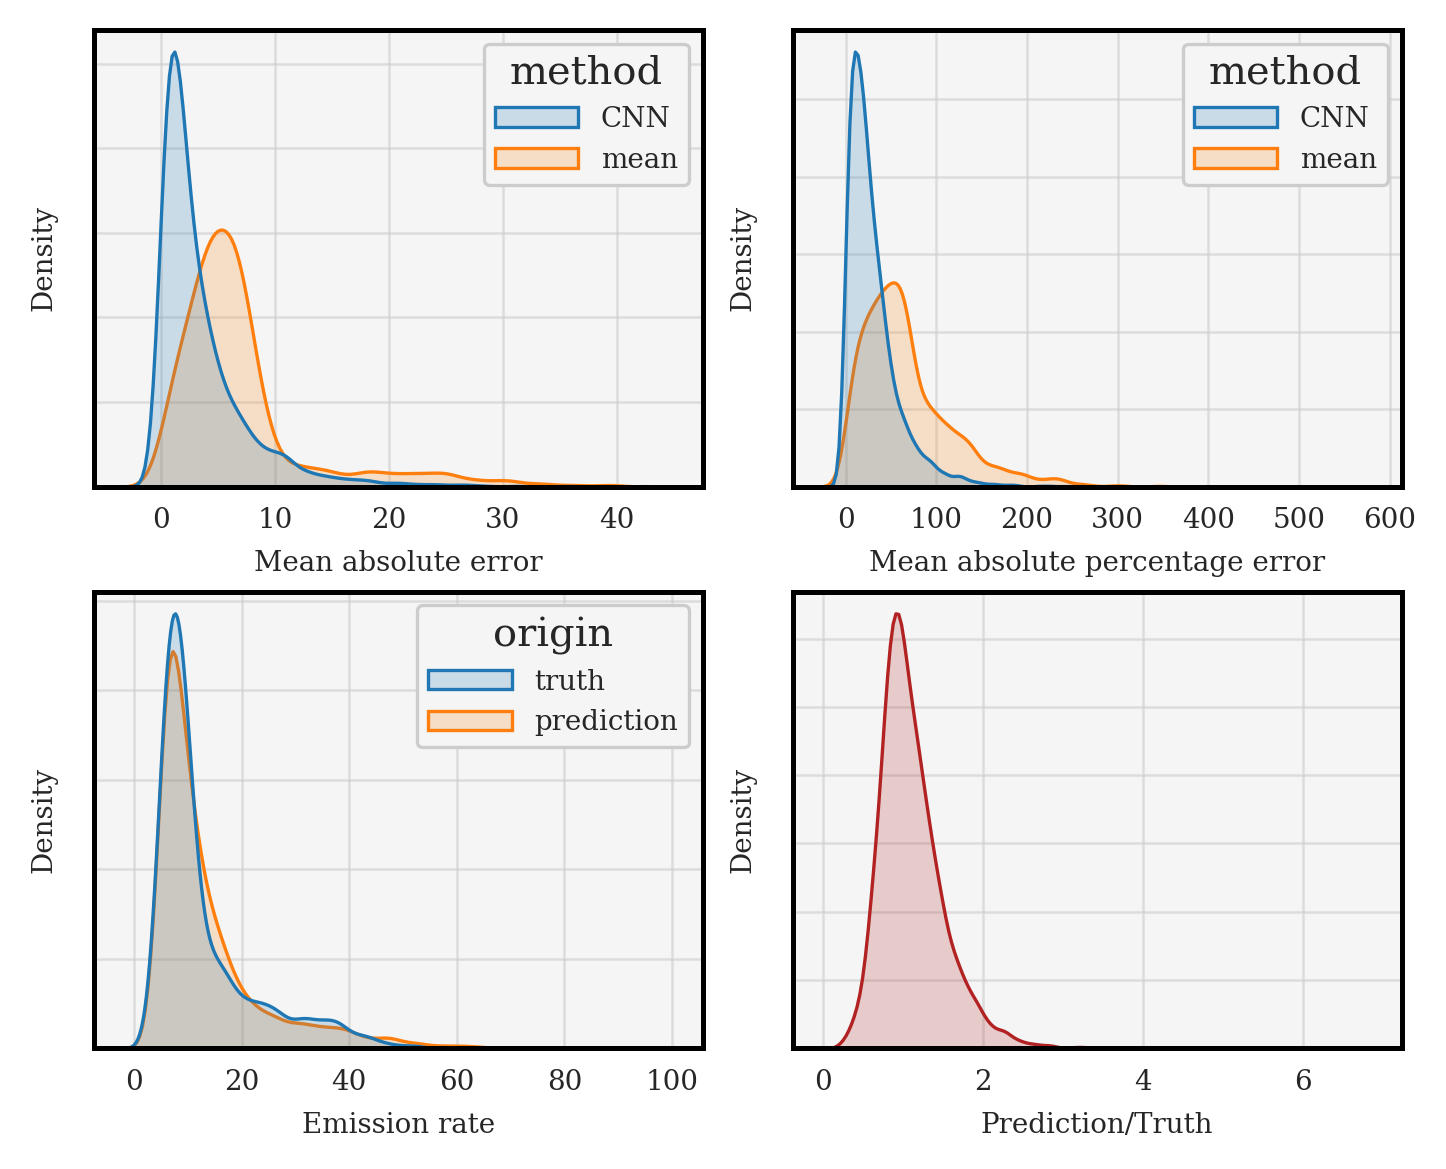

In [11]:
model_eval.get_summary_histo_inversion(model, data_val)

nwbce: tf.Tensor(10.562113, shape=(), dtype=float32)
idx 3250
origin: smart_2km_Lip_64
time: 2015-08-21T21:00:00.000000000
emiss: [14.4068  14.54977 15.26355]
nwbce: tf.Tensor(0.038178444, shape=(), dtype=float32)
idx 379
origin: smart_2km_Ber_64
time: 2015-08-22T15:00:00.000000000
emiss: [13.55702 12.37026 12.43296]
nwbce: tf.Tensor(3.3335724, shape=(), dtype=float32)
idx 3608
origin: smart_2km_Tur_64
time: 2015-04-06T17:00:00.000000000
emiss: [ 9.808105 10.35822  10.54143 ]
1/1 [==============================] - 0s 15ms/step


<Figure size 1920x1440 with 0 Axes>

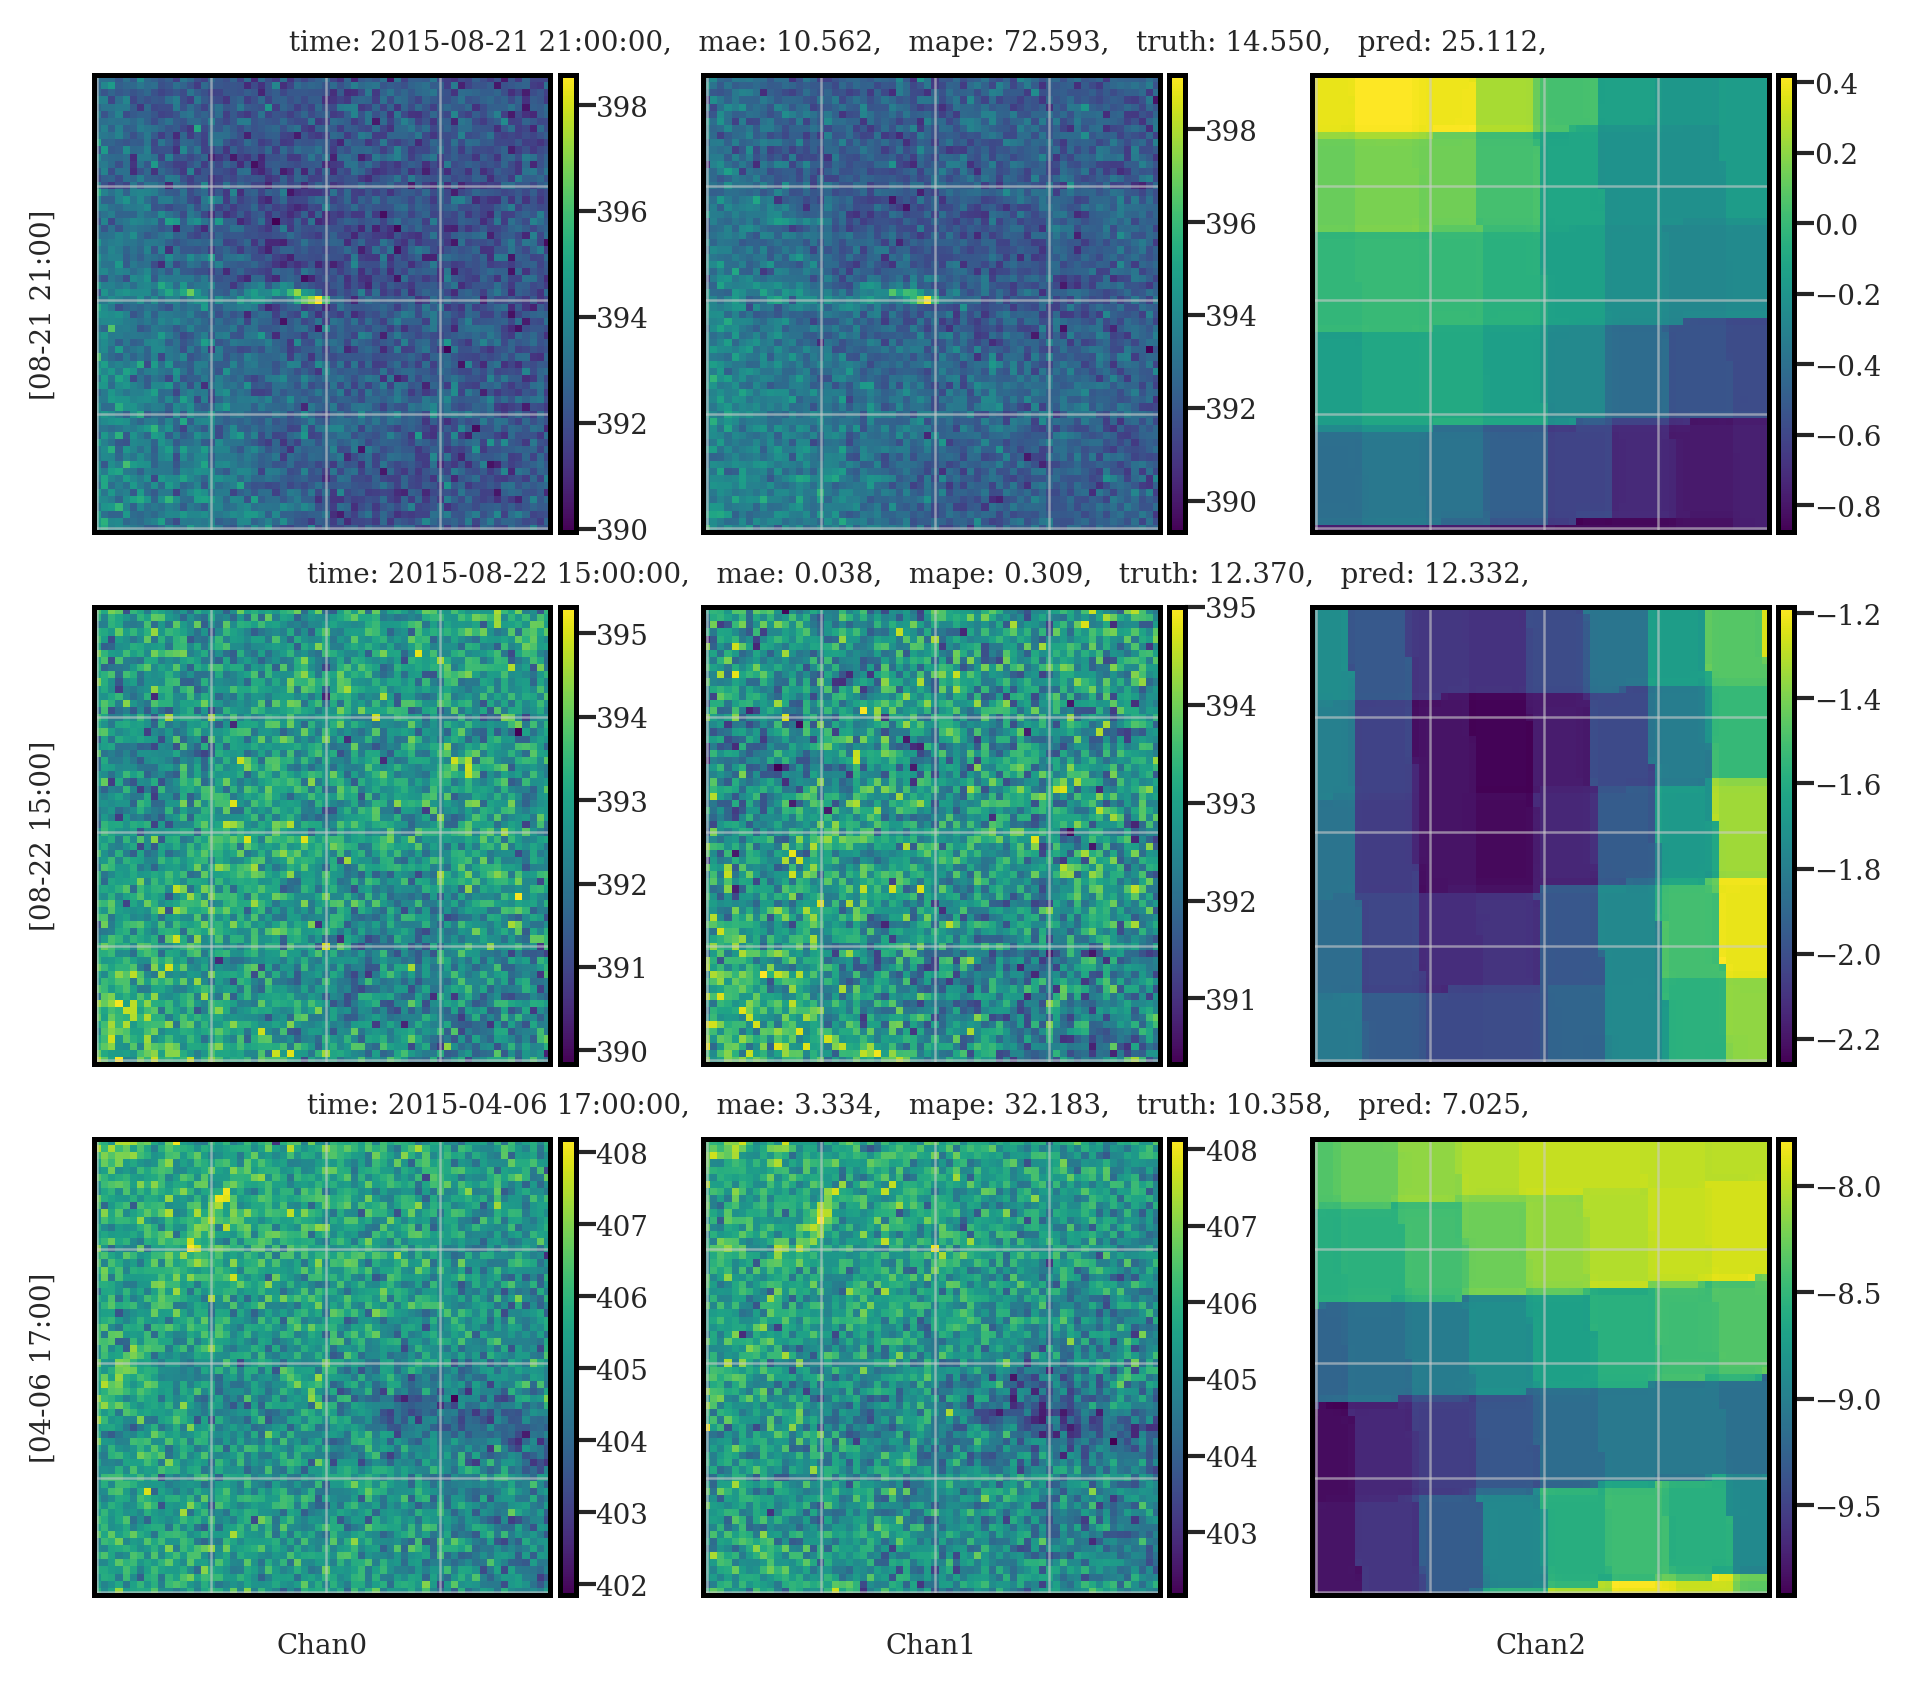

In [12]:
model_eval.plot_inversion_examples(
    data_val, metrics_val["mae"], metrics_val["mape"], model
)